# Getting dependencies and data set


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [3]:
data_set = pd.read_csv('train.csv')

In [4]:
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data_set.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
data_set.shape

(614, 13)

In [7]:
data_set['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
data_set.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we can see that there are many missing values.


# Handling the missing data

In [9]:
data_set['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
data_set['Gender'].fillna(data_set['Gender'].mode()[0], inplace = True)

In [11]:
data_set['Married'].fillna(data_set['Married'].mode()[0], inplace = True)
data_set['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [12]:
data_set['Dependents'].fillna(data_set['Dependents'].mode()[0], inplace = True)
data_set['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
data_set['Self_Employed'].fillna(data_set['Self_Employed'].mode()[0], inplace = True)
data_set['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
data_set['LoanAmount'].fillna(data_set['LoanAmount'].mean(), inplace = True)

In [15]:
data_set['Loan_Amount_Term'].fillna(data_set['Loan_Amount_Term'].mode()[0], inplace = True)

In [16]:
data_set['Credit_History'].fillna(data_set['Credit_History'].mode()[0], inplace = True)

In [17]:
data_set.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Data Analysis and Visualization

In [19]:
sns.set()

<AxesSubplot:xlabel='Gender', ylabel='count'>

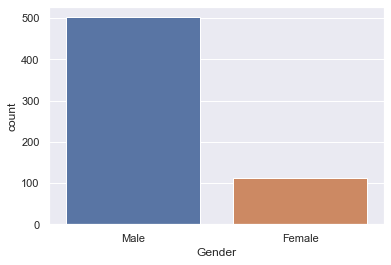

In [20]:
sns.countplot(x = 'Gender', data = data_set)

<AxesSubplot:xlabel='Married', ylabel='count'>

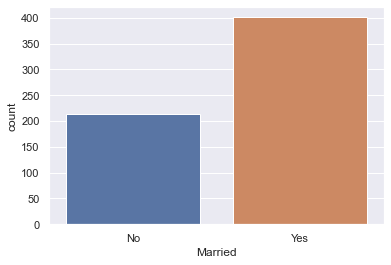

In [21]:
sns.countplot(x = 'Married', data = data_set)

<AxesSubplot:xlabel='Married', ylabel='count'>

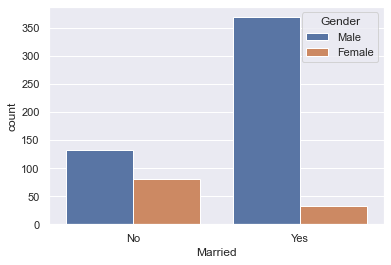

In [22]:
sns.countplot(x = 'Married', hue = 'Gender', data = data_set)

<AxesSubplot:xlabel='Gender', ylabel='count'>

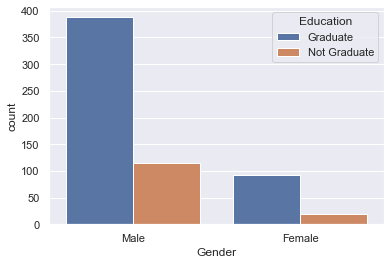

In [23]:
sns.countplot(x = 'Gender', hue = 'Education', data = data_set)

<AxesSubplot:xlabel='Gender', ylabel='count'>

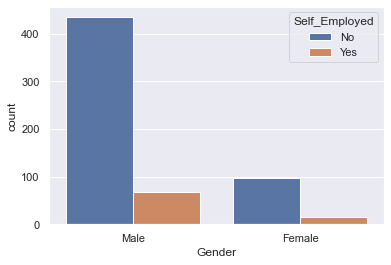

In [24]:
sns.countplot(x = 'Gender', hue = 'Self_Employed', data = data_set)

# Encoding catagorical data

In [25]:
# converting categorical columns to numerical values
data_set = data_set.replace({'Married' : {'Yes' : 1, 'No' : 0}, 'Gender' : {'Male' : 2, 'Female' : 1}, 'Self_Employed':{'No':0,'Yes':1},
                 'Education':{'Graduate':1,'Not Graduate':0}, 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}, 'Loan_Status' : {'Y' : 1, 'N' : 0}})

In [26]:
data_set = data_set.replace({'Dependents' : {'3+' : 4}})

In [27]:
data_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,2,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,2,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,2,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,2,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,2,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,2,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,2,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


# Model training

In [28]:
x = data_set.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)

In [29]:
y = data_set['Loan_Status']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)
x.shape, X_train.shape, X_test.shape

((614, 11), (460, 11), (154, 11))

In [31]:
classifier_model = svm.SVC(kernel = 'linear')

In [32]:
# fitting the data in model
classifier_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [33]:
x_train_prediction = classifier_model.predict(X_train)

In [34]:
x_train_accuracy = accuracy_score(x_train_prediction, Y_train)

In [35]:
x_train_accuracy

0.8043478260869565

In [36]:
x_test_prediction = classifier_model.predict(X_test)

In [37]:
x_test_accuracy = accuracy_score(x_test_prediction, Y_test)

In [38]:
x_test_accuracy

0.7922077922077922